# 

In [1]:
from tinyec import registry
import hashlib, secrets, binascii
from sympy import isprime
import random
import numpy as np
import time as t
import tracemalloc
import pyDHE
import pandas as pd
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP

def rsa(msg):
    start_rsa_eryt = t.time()
    keyPair = RSA.generate(3072)
    pubKey = keyPair.publickey()
    print(f"Public key:  (n={hex(pubKey.n)}, e={hex(pubKey.e)})")
    pubKeyPEM = pubKey.exportKey()
    print(pubKeyPEM.decode('ascii'))
    print(f"Private key: (n={hex(pubKey.n)}, d={hex(keyPair.d)})")
    privKeyPEM = keyPair.exportKey()
    print(privKeyPEM.decode('ascii'))
    msg1=bytes(msg,'utf-8')
    #msg = b'A message for encryption'
    encryptor = PKCS1_OAEP.new(pubKey)
    encrypted = encryptor.encrypt(msg1)
    print("Encrypted mesage using RSA:", binascii.hexlify(encrypted))
    end_rsa_eryt = t.time()
    eryt_time_rsa = end_rsa_eryt-start_rsa_eryt
    print("Encryption Time for RSA: ",(eryt_time_rsa),"s")
    trial_encryption_rsa.append(eryt_time_rsa)
    start_rsa_dryt = t.time()
    decryptor = PKCS1_OAEP.new(keyPair)
    decrypted = decryptor.decrypt(encrypted)
    print("Decrypted mesage using RSA:",decrypted)
    end_rsa_dryt = t.time()
    dryt_time_rsa = end_rsa_dryt-start_rsa_dryt
    print("Decryption Time for RSA: ",(dryt_time_rsa),"s")
    trial_decryption_rsa.append(dryt_time_rsa)
    

def DH_Exchange(A,B,publickey_N, publickey_G):
    
    start_dh_eryt = t.time() #Computing start time for deffie helman encryption
    SharedKey_A=A.update(publickey_G)
    SharedKey_B=B.update(publickey_N)
    print("SharedKey:",SharedKey_B)
    #msg = 'A message for encryption'
    encrypted_msg=""
    decrypted_msg=""
    for c in msg:
        encrypted_msg += chr(ord(c)+(SharedKey_B%1000))
    print("Encrypted mesage using Deffie Helman:",encrypted_msg)
    end_dh_eryt = t.time()
    eryt_time_dh = end_dh_eryt-start_dh_eryt
    print("Encryption Time for Diffie Helman: ",eryt_time_dh, "s")
    trial_encryption_dh.append(eryt_time_dh)
    start_dh_dryt = t.time()
    for c in encrypted_msg:
        decrypted_msg += chr(ord(c)-(SharedKey_B%1000))
    print("Decrypted mesage using Deffie Helman:",decrypted_msg)
    end_dh_dryt = t.time()
    dryt_time_dh = end_dh_dryt-start_dh_dryt
    print("Decryption Time for Diffie Helman: ",dryt_time_dh, "s")
    trial_decryption_dh.append(dryt_time_dh)
    
def ecc_point_to_256_bit_key(point):
    sha = hashlib.sha256(int.to_bytes(point.x, 32, 'big'))
    sha.update(int.to_bytes(point.y, 32, 'big'))
    return sha.digest()

def encrypt_ECC(msg,pubKey):
    ciphertextPrivKey = secrets.randbelow(curve.field.n)
    sharedECCKey = ciphertextPrivKey * pubKey
    secretKey = ecc_point_to_256_bit_key(sharedECCKey)
    encrypted_msg=""
    for c in msg:
        encrypted_msg += chr(ord(c)+(int.from_bytes(secretKey,'big')%1000))
    print("Encrypted mesage using ECC:",encrypted_msg)
    ciphertextPubKey = ciphertextPrivKey * curve.g
    return secretKey, encrypted_msg,ciphertextPubKey

def decrypt_ECC(secretKey, encrypted_msg, ciphertextPubKey, privKey):
    decrypted_msg=""
    for c in encrypted_msg:
        decrypted_msg += chr(ord(c)-(int.from_bytes(secretKey,'big')%1000))
    print("Decrypted mesage using ECC:",decrypted_msg)
    return secretKey






In [2]:
message="Early computer-era cryptography Cryptanalysis of the new mechanical ciphering devices proved to be both difficult and laborious. In the United Kingdom, cryptanalytic efforts at Bletchley Park during WWII spurred the development of more efficient means for carrying out repetitious tasks, such as military code breaking (decryption)."

In [3]:
msg=message
print("Implementation of Deffie Helman")
trial_memory_dh=[]
trial_encryption_dh=[]
trial_decryption_dh=[]
for i in range(0,5):
    A=pyDHE.new(18) #
    B=pyDHE.new(18)
    publickey_N=A.getPublicKey() #Generate public key for A
    publickey_G=B.getPublicKey() #Generate public key for B
    tracemalloc.start() #Computing memory allocation for deffie helman encryption
    DH_Exchange(A,B,publickey_N, publickey_G) # Computing key exchange for Deffie Helman
    mstart_dh,mend_dh=tracemalloc.get_traced_memory()
    mtotal_dh=(mend_dh-mstart_dh)/1024
    print("Memory used by Deffie Helman:",mtotal_dh, "KB") #Priniting memory used by Deffie Helman
    tracemalloc.stop()
    trial_memory_dh.append(mtotal_dh)
print("Memory used for all Trials in DH implementation")
print(trial_memory_dh)
print("Encyption Time used for all Trials in DH implementation")
print(trial_encryption_dh)
print("Decryption Time used for all Trials in DH implementation")
print(trial_decryption_dh)
memory_avg_dh=sum(trial_memory_dh)/5
print("Average Memory for Diffie Hellman trials")
print(memory_avg_dh)
encrpyt_time_avg_dh=sum(trial_encryption_dh)/5
print("Average Encyption Time for Diffie Hellman trials")
print(encrpyt_time_avg_dh)
decrpyt_time_avg_dh=sum(trial_decryption_dh)/5
print("Average Decryption Time for Diffie Hellman trials")
print(decrpyt_time_avg_dh)


Implementation of Deffie Helman
SharedKey: 103231315166754738943920527089120950960383284029019026993891940508692661726440610291395375420528623044717613525487809134764021303130989282552897310971301521574651416225637331417677718356157301338787985992012407532116239887006546379301686894643305509703958475290200535777940011354394854973109532285433253286321700148693584122106448419663980195854848907287989082122984217250328037520284223711321275871641802111096431722824579494870948955427740404501539167436986218645193856284417775731970861544410285282784873116096072631106357939618779455468952460589359397049806619826637649277133732885646967204303813454547253401230022685890735604078993690430323443736025403310704729914605857913051140023953925787424142234830464938906367728724172586954028591404364520315154463319993420528393428150871037463201067107061410581491950421884383474657729376856269307927749436700531330128888919042088585243564354453029487863217359094988382329128153590321430952815805435771049091007

SharedKey: 17915889488905195792098786628198188860979920782373495422831073374693173817289551565039491592807530132289110143762242047388442695344507534467627303740818042049386718190328793657817948721916559756310069684096313949709142494129136856741734006268848521713083090300408364412098420634205195851552617346966539496457245115493855929087178463056739252283459945190816419957813594184106787549835916886160888174974642709224551771761994238833914173003026989124048565194433189607776929352734273051247210505806811956252862042027147895162284908666706626637149372836523002283564549450337849449463706120103143671766804250641842518318208823651275566731072847500506968928571365356652208471792456892251650257522617862725697018728794377695533535793494836951755792121649475681451823204002418853624792502366761295606677844339281414496462920770338978632463055468201207648323602902299580797053387435468742600713787305911924668088419479903989169780270627503534819933642866741708156401363503844898376537268812009266663

In [4]:
trial_memory_ecdh=[]
trial_encryption_ecdh=[]
trial_decryption_ecdh=[]
#Implementation of ECC
for i in range(0,5):
    curve = registry.get_curve('brainpoolP256r1') #Generating curve for ECC
    privKey = secrets.randbelow(curve.field.n) #Generate private key for ECC
    pubKey = privKey * curve.g # Generate public key for ECC

    start_ecc_eryt = t.time() #Computing start time for ECC encryption
    tracemalloc.start() #Computing memory allocation for ECC encryption
    print("Implementation of ECC")
    secretKey ,encrypt_msg, ECC_curve = encrypt_ECC(msg, pubKey)
    end_ecc_eryt = t.time()
    eryt_time_ecc = end_ecc_eryt-start_ecc_eryt
    print("Encryption Time for ECDH: ",eryt_time_ecc, "s")
    trial_encryption_ecdh.append(eryt_time_ecc)
    start_ecc_dryt = t.time() #Computing start time for ECC encryption
    tracemalloc.start()
    decryptedMsg = decrypt_ECC(secretKey, encrypt_msg, ECC_curve, privKey)
    print("ECC Curve Equation: (x,y) on (y^2=x^3+ax+b)", ECC_curve)
    mstart_ecc,mend_ecc=tracemalloc.get_traced_memory()
    mtotal_ecdh=(mend_ecc-mstart_ecc)/1024
    print("Memory used=",mtotal_ecdh, "kb")
    end_ecc_dryt = t.time()
    tracemalloc.stop()
    dryt_time_ecc = end_ecc_dryt-start_ecc_dryt
    print("Decryption Time for ECDH: ",dryt_time_ecc, "s")
    trial_decryption_ecdh.append(dryt_time_ecc)
    trial_memory_ecdh.append(mtotal_ecdh)
print("Memory used for all Trials in ECDH implementation")
print(trial_memory_ecdh)
print("Encyption Time used for all Trials in ECDH implementation")
print(trial_encryption_ecdh)
print("Decryption Time used for all Trials in ECDH implementation")
print(trial_decryption_ecdh)
memory_avg_ecdh=sum(trial_memory_ecdh)/5
print("Average Memory for ECDH trials")
print(memory_avg_ecdh)
encrpyt_time_avg_ecdh=sum(trial_encryption_ecdh)/5
print("Average Encyption Time for ECDH trials")
print(encrpyt_time_avg_ecdh)
decrpyt_time_avg_ecdh=sum(trial_decryption_ecdh)/5
print("Average Decryption Time for ECDH trials")
print(decrpyt_time_avg_ecdh)


Implementation of ECC
Encrypted mesage using ECC: Qm~x,o{y|q~9q~m,o~|{s~m|t,O~|mzmxu,{r,tq,zq,yqotmzuomx,ou|tq~uzs,pquoq,|~{qp,{,nq,n{t,purruox,mzp,xmn{~u{:,Uz,tq,azuqp,Wuzsp{y8,o~|mzmxuo,qrr{~,m,Nxqotxq,\m~w,p~uzs,ccUU,|~~qp,tq,pqqx{|yqz,{r,y{~q,qrruouqz,yqmz,r{~,om~~uzs,{,~q|quu{,mw8,ot,m,yuxum~,o{pq,n~qmwuzs,4pqo~|u{z5:
Encryption Time for ECDH:  3.0460071563720703 s
Decrypted mesage using ECC: Early computer-era cryptography Cryptanalysis of the new mechanical ciphering devices proved to be both difficult and laborious. In the United Kingdom, cryptanalytic efforts at Bletchley Park during WWII spurred the development of more efficient means for carrying out repetitious tasks, such as military code breaking (decryption).
ECC Curve Equation: (x,y) on (y^2=x^3+ax+b) (66401144867947591294651003188919007160789409792571869935386138012348046127522, 44736448366532373741089257030646023175282748626312085499461796156899271286581) on "b

In [5]:
trial_memory_rsa=[]
trial_encryption_rsa=[]
trial_decryption_rsa=[]
print("Implementation of RSA ")
for i in range(0,5):
    tracemalloc.start() #Computing memory allocation for RSA encryption
    rsa(msg)
    mstart_rsa,mend_rsa=tracemalloc.get_traced_memory()
    mtotal_rsa=(mend_rsa-mstart_rsa)/1024
    print("Memory used=",mtotal_rsa, "kB")
    tracemalloc.stop()
    trial_memory_rsa.append(mtotal_rsa)
print("Memory used for all Trials in RSA implementation")
print(trial_memory_rsa)
print("Encryption Time used for all Trials in RSA implementation")
print(trial_encryption_rsa)
print("Decryption Time used for all Trials in RSA implementation")
print(trial_decryption_rsa)
memory_avg_rsa=sum(trial_memory_rsa)/5
print("Average Memory for RSA trials")
print(memory_avg_rsa)
encrpyt_time_avg_rsa=sum(trial_encryption_rsa)/5
print("Average Encryption Time for RSA trials")
print(encrpyt_time_avg_rsa)
decrpyt_time_avg_rsa=sum(trial_decryption_rsa)/5
print("Average Decryption Time for RSA trials")
print(decrpyt_time_avg_rsa)

Implementation of RSA 
Public key:  (n=0xa123a1713585029e622f22119e46f17dbc9ed2f5c9711388c10e56ce94f95084f4b22e8cbbf02841a4a753ede6d83fb5337b5e197a953dc30824041b59ad2ba6e2433456cb864493248793e13b30ad352dbc1919ceb42ef6e6408f3e9783d70828e73e79ed824da8995cec19899e095b39396587956be8dd2cec54858d89c852250819c1e72e4446fb618a5841b3fe0dd9b098e54b3ddad6dc434b3e990fe3dc12b7068db9d51161b68d838c432b79a1a9c20a55fbf908c6a19d40da3f8a2dffbddca5f3906a047b13af06ab02670ca3c5c2ddabc5415feaf4ab32c8e83a7e257fbcbda4b2dd53c590b9c2fc8c973f899181c1f7e2eb48e848b07c47128bbd77ae2183aa7e8ace6519892110a686b05b20d7313326d6673345fb69d080d677999b857792b61eae733637148c0b987d0b1aa2e2f4b0d71375d6eb4e07858093fdb9e4cfedb4f8d6e539bb8572717e4014bf1f6abb96570e85387a3db0b63fb0b96e339bfd08f05fa615ef1a8fa51b75c07d967b9917c47cfb3659986da2a262c9, e=0x10001)
-----BEGIN PUBLIC KEY-----
MIIBojANBgkqhkiG9w0BAQEFAAOCAY8AMIIBigKCAYEAoSOhcTWFAp5iLyIRnkbx
fbye0vXJcROIwQ5WzpT5UIT0si6Mu/AoQaSnU+3m2D+1M3teGXqVPcMIJAQbWa0r
puJDNFbLhkSTJIeT4Tswr

Public key:  (n=0xd735c95808c3b0519a6dcc1a4e4f0edc524a3659f588812ef4a7232e85882fd149185e426dbe9603bbc6676afbe7f908f565f31218d0aa11c4c754e55c1e2e8939b5cb18cc1d60a4192ea4d599b15308b03ca791cdf39701094a8b29077a04558aefd147c7e85ff084abdee995548bc8a3317a986e82e9b0b328cfb2fd0c5f3c4edaf540671ac1cbe5e3cf411a2593f4f937cd835e8559950ecc9943d9eb3011ac22823f816b1463dac068905e5e61f9b3f8b529fa481d946aededb1ff59d0bf4c6c789746ebd32c0e9536f4eae34b842afa0136ebbeb93a79ecf8246340f05f25ca147db0e17f55456247f6cdc2ce54485b6320e5e589f3d7c1093e81514cd569360927a617ae3dc7b3a961b9024e2dc927a2d379a79a97a5e4d37081379988414b4d0fa1884157064b6c5c4fb482eecddb9768cd233ce25433ece0847678d5cc88e10c48c7850816d765333bfb49958fbb341f81fcc549d2d638fc94cb435ed60eefd937275c6ce06a4576b5bdc3ff51a2ea33a68d1964b3d564e9728b1157, e=0x10001)
-----BEGIN PUBLIC KEY-----
MIIBojANBgkqhkiG9w0BAQEFAAOCAY8AMIIBigKCAYEA1zXJWAjDsFGabcwaTk8O
3FJKNln1iIEu9KcjLoWIL9FJGF5Cbb6WA7vGZ2r75/kI9WXzEhjQqhHEx1TlXB4u
iTm1yxjMHWCkGS6k1ZmxUwiwPKeRzfOXAQlKiykHegRV

Public key:  (n=0xca9e9011a902da5d232572064d466048f768540e38ea150c1a5cf51b4166d8698840ecdc0b7fb500112c5036934f893148499183e21dfc67a50f9c670f143e4e3d4b843c76e815f92b4ee9f4ecace6e6b7c0341d9c7b6ddef50488ae438fccb5ae760db40baf3269b4deb3f919d2ebd370ac8e353a4856bbaa2be29ca287f0485078066f9f219fa47d443b73d7e9e37d10df398c2e400619cf9066eac86b0a6e061ae8859b3427364a3b2a703732471e7101ddf40953733d2cb083bc1f1e21be73af98609bbcb7254978167aa9efb0b5bf0b7fd4ed8749c5c7a40de21e3f358e3c0f9798fbef0d692d817d82fbf3457aaff7835b6e479ecd247011e61f470e7873dcaca0b237d9899de589ef2e5ec4131a6186bbe4b2e367fda0aa8faa738030b334ef206edb490e3df59c42b95e023735532de602c7a21c77c411d14cbc1925f7d6f55fced02f4b75b8fb36f7895fde576351425e19c25047f13baa200cf5981b0aa41c5456f837f3a707f171813caaca47a5bf616c536fdfe3dd59751973a1, e=0x10001)
-----BEGIN PUBLIC KEY-----
MIIBojANBgkqhkiG9w0BAQEFAAOCAY8AMIIBigKCAYEAyp6QEakC2l0jJXIGTUZg
SPdoVA446hUMGlz1G0Fm2GmIQOzcC3+1ABEsUDaTT4kxSEmRg+Id/GelD5xnDxQ+
Tj1LhDx26BX5K07p9Oys5ua3wDQdnHtt3vUEiK5Dj8y1

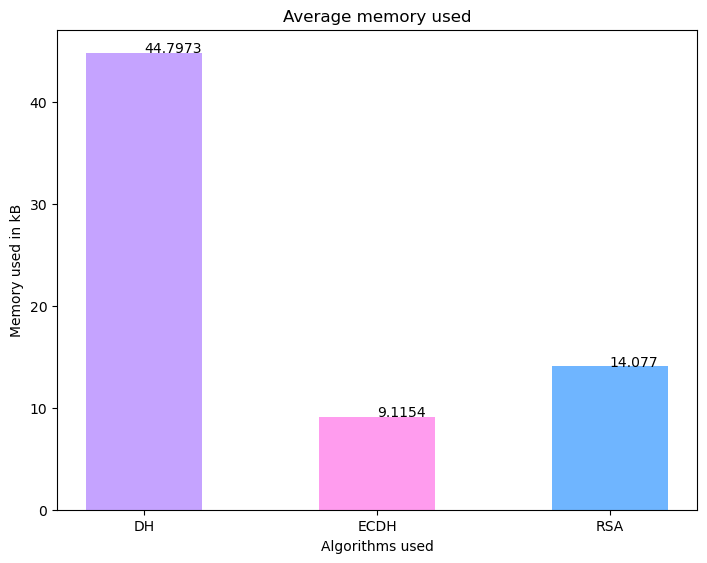

In [6]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algo = ['DH', 'ECDH', 'RSA']
plt.title("Average memory used")
plt.xlabel("Algorithms used")
plt.ylabel("Memory used in kB")
memory = [round(memory_avg_dh,4),round(memory_avg_ecdh,4),round(memory_avg_rsa,4)]
addlabels(algo, memory)
ax.bar(algo,memory,width=0.5, color=['#C5A3FF','#FF9CEE','#6FB5FF'])
plt.show()

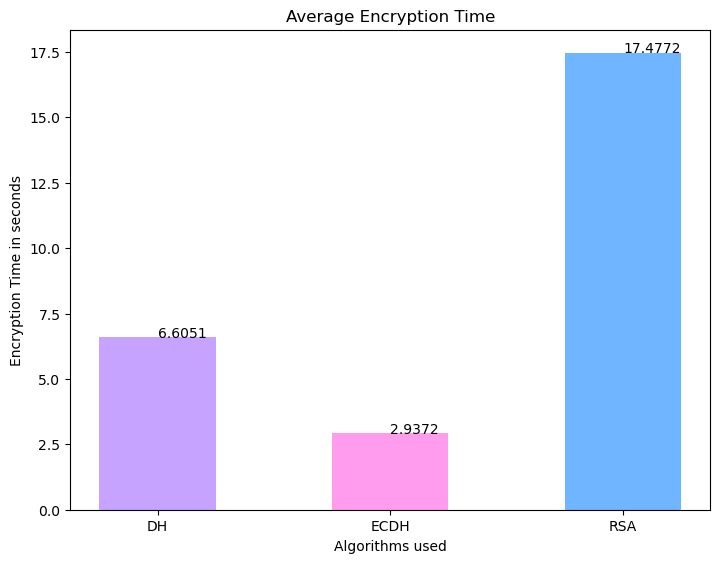

In [7]:
fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])
algo = ['DH', 'ECDH', 'RSA']
plt.title("Average Encryption Time")
plt.xlabel("Algorithms used")
plt.ylabel("Encryption Time in seconds")
memory = [round(encrpyt_time_avg_dh,4),round(encrpyt_time_avg_ecdh,4),round(encrpyt_time_avg_rsa,4)]
addlabels(algo, memory)
ax.bar(algo,memory,width=0.5, color=['#C5A3FF','#FF9CEE','#6FB5FF'])
plt.show()

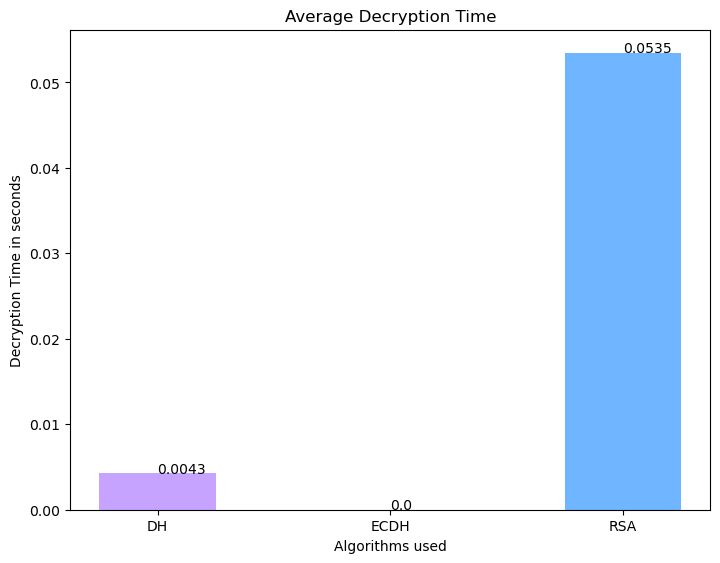

In [8]:
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
algo = ['DH', 'ECDH', 'RSA']
plt.title("Average Decryption Time")
plt.xlabel("Algorithms used")
plt.ylabel("Decryption Time in seconds")
memory = [round(decrpyt_time_avg_dh,4),round(decrpyt_time_avg_ecdh,4),round(decrpyt_time_avg_rsa,4)]
addlabels(algo, memory)
ax.bar(algo,memory,width=0.5, color=['#C5A3FF','#FF9CEE','#6FB5FF'])
plt.show()